<a href="https://colab.research.google.com/github/Rokuske/Data/blob/main/Bank_analize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорты библиотек и работа с диском

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Подключаемся к гугл диску
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Не хватает ОЗУ для работы со всеми данными


In [ ]:
bank_data = pd.read_csv('/content/gdrive/My Drive/train.xls')
test_data = pd.read_csv('/content/gdrive/My Drive/test.csv')
prev_loan = pd.read_csv('/content/gdrive/My Drive/previous_loan.csv')
card = pd.read_csv('/content/gdrive/My Drive/credit_card_balance.csv')
#bki = pd.read_csv('/content/gdrive/My Drive/bki.csv')
#bki_balance = pd.read_csv('/content/gdrive/My Drive/bki_balance.csv')
#cash_posh = pd.read_csv('/content/gdrive/My Drive/cash_pos_balance.csv')
#payments = pd.read_csv('/content/gdrive/My Drive/installments_payments.csv') 

# Работа С данными


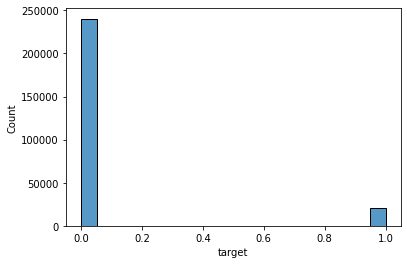

In [ ]:
sns.histplot(data=bank_data, x='target')

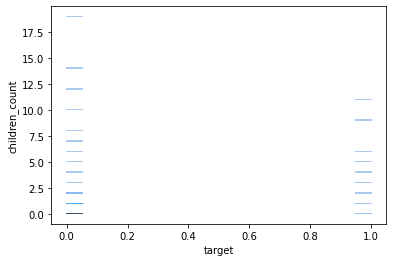

In [ ]:
sns.histplot(data=bank_data, x='target', y = 'children_count')

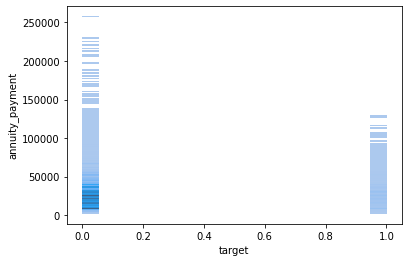

In [ ]:
sns.histplot(data=bank_data, x='target', y = 'annuity_payment')


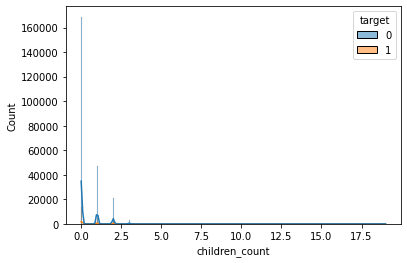

In [ ]:
sns.histplot(data=bank_data, x="children_count", kde=True, hue="target")

In [ ]:
data_Num1 = bank_data[['reco_id_curr', 'target', 'children_count', 'income', 'loan_body']]
data_Num1 = data_Num1.fillna(0)

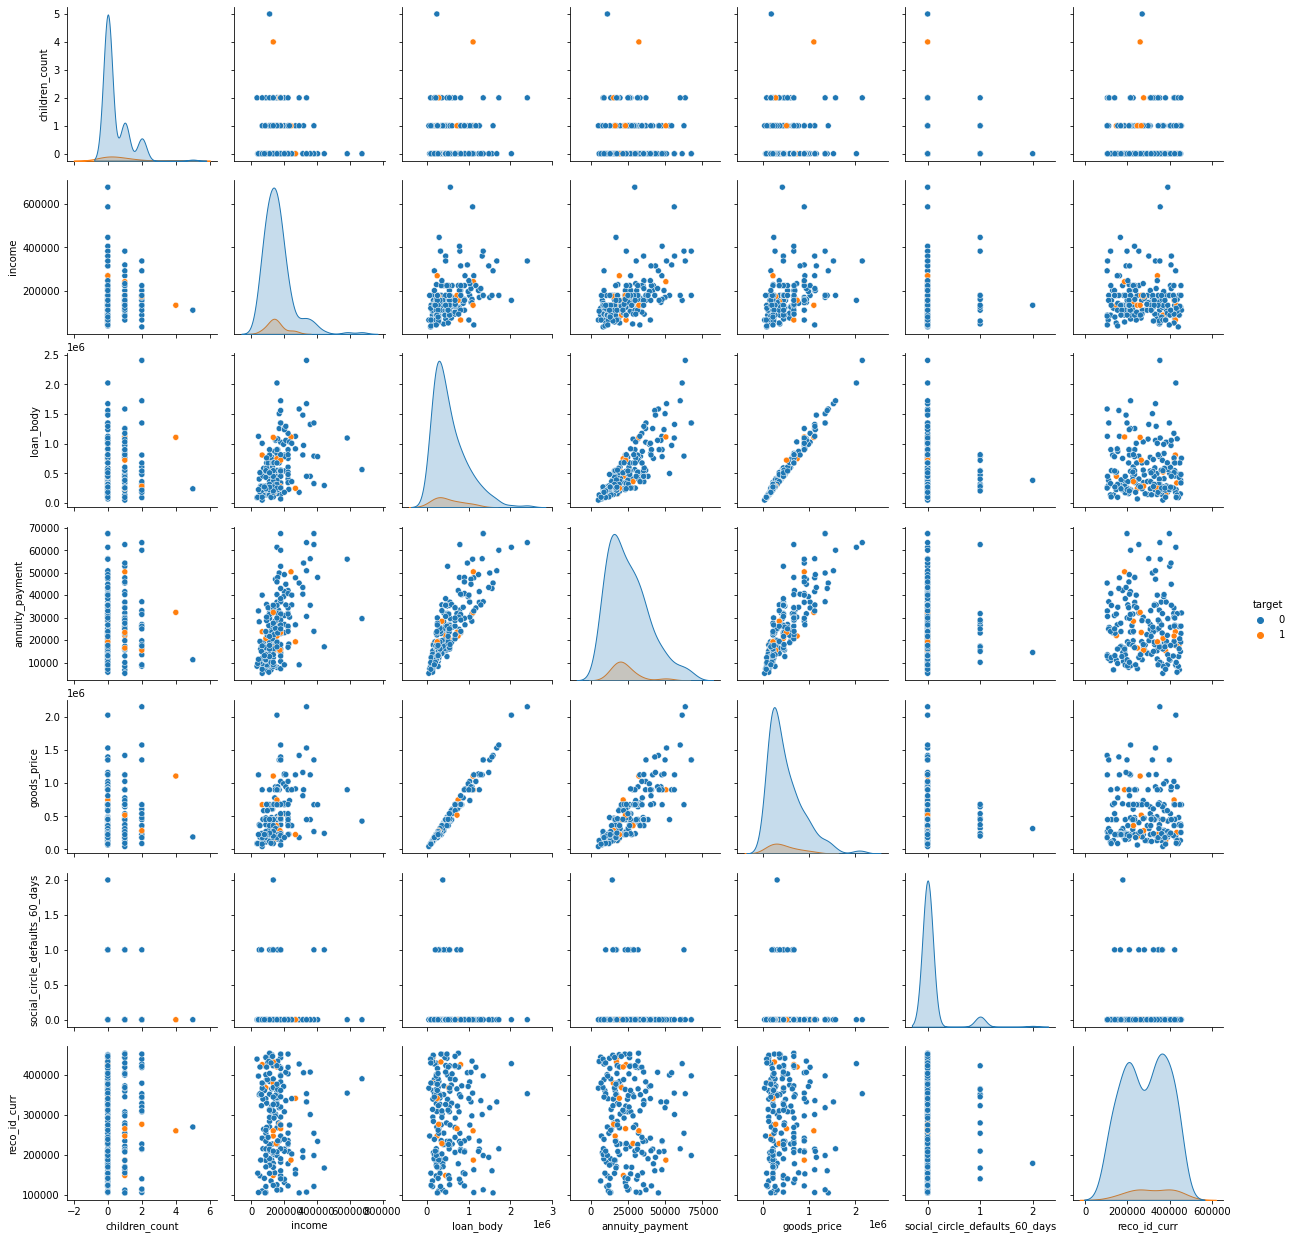

In [ ]:
np.random.seed(2023)
data_Num1_exp = data_Num1.sample(200)
sns.pairplot(data_Num1_exp, hue ='target')
plt.show()

In [ ]:
data_Num3 = bank_data[['reco_id_curr', 'target',
                       'document_12_flag','document_13_flag',
                       'document_14_flag','document_15_flag',
                       'document_20_flag','document_21_flag',]]
data_Num3 = data_Num3.fillna(0)

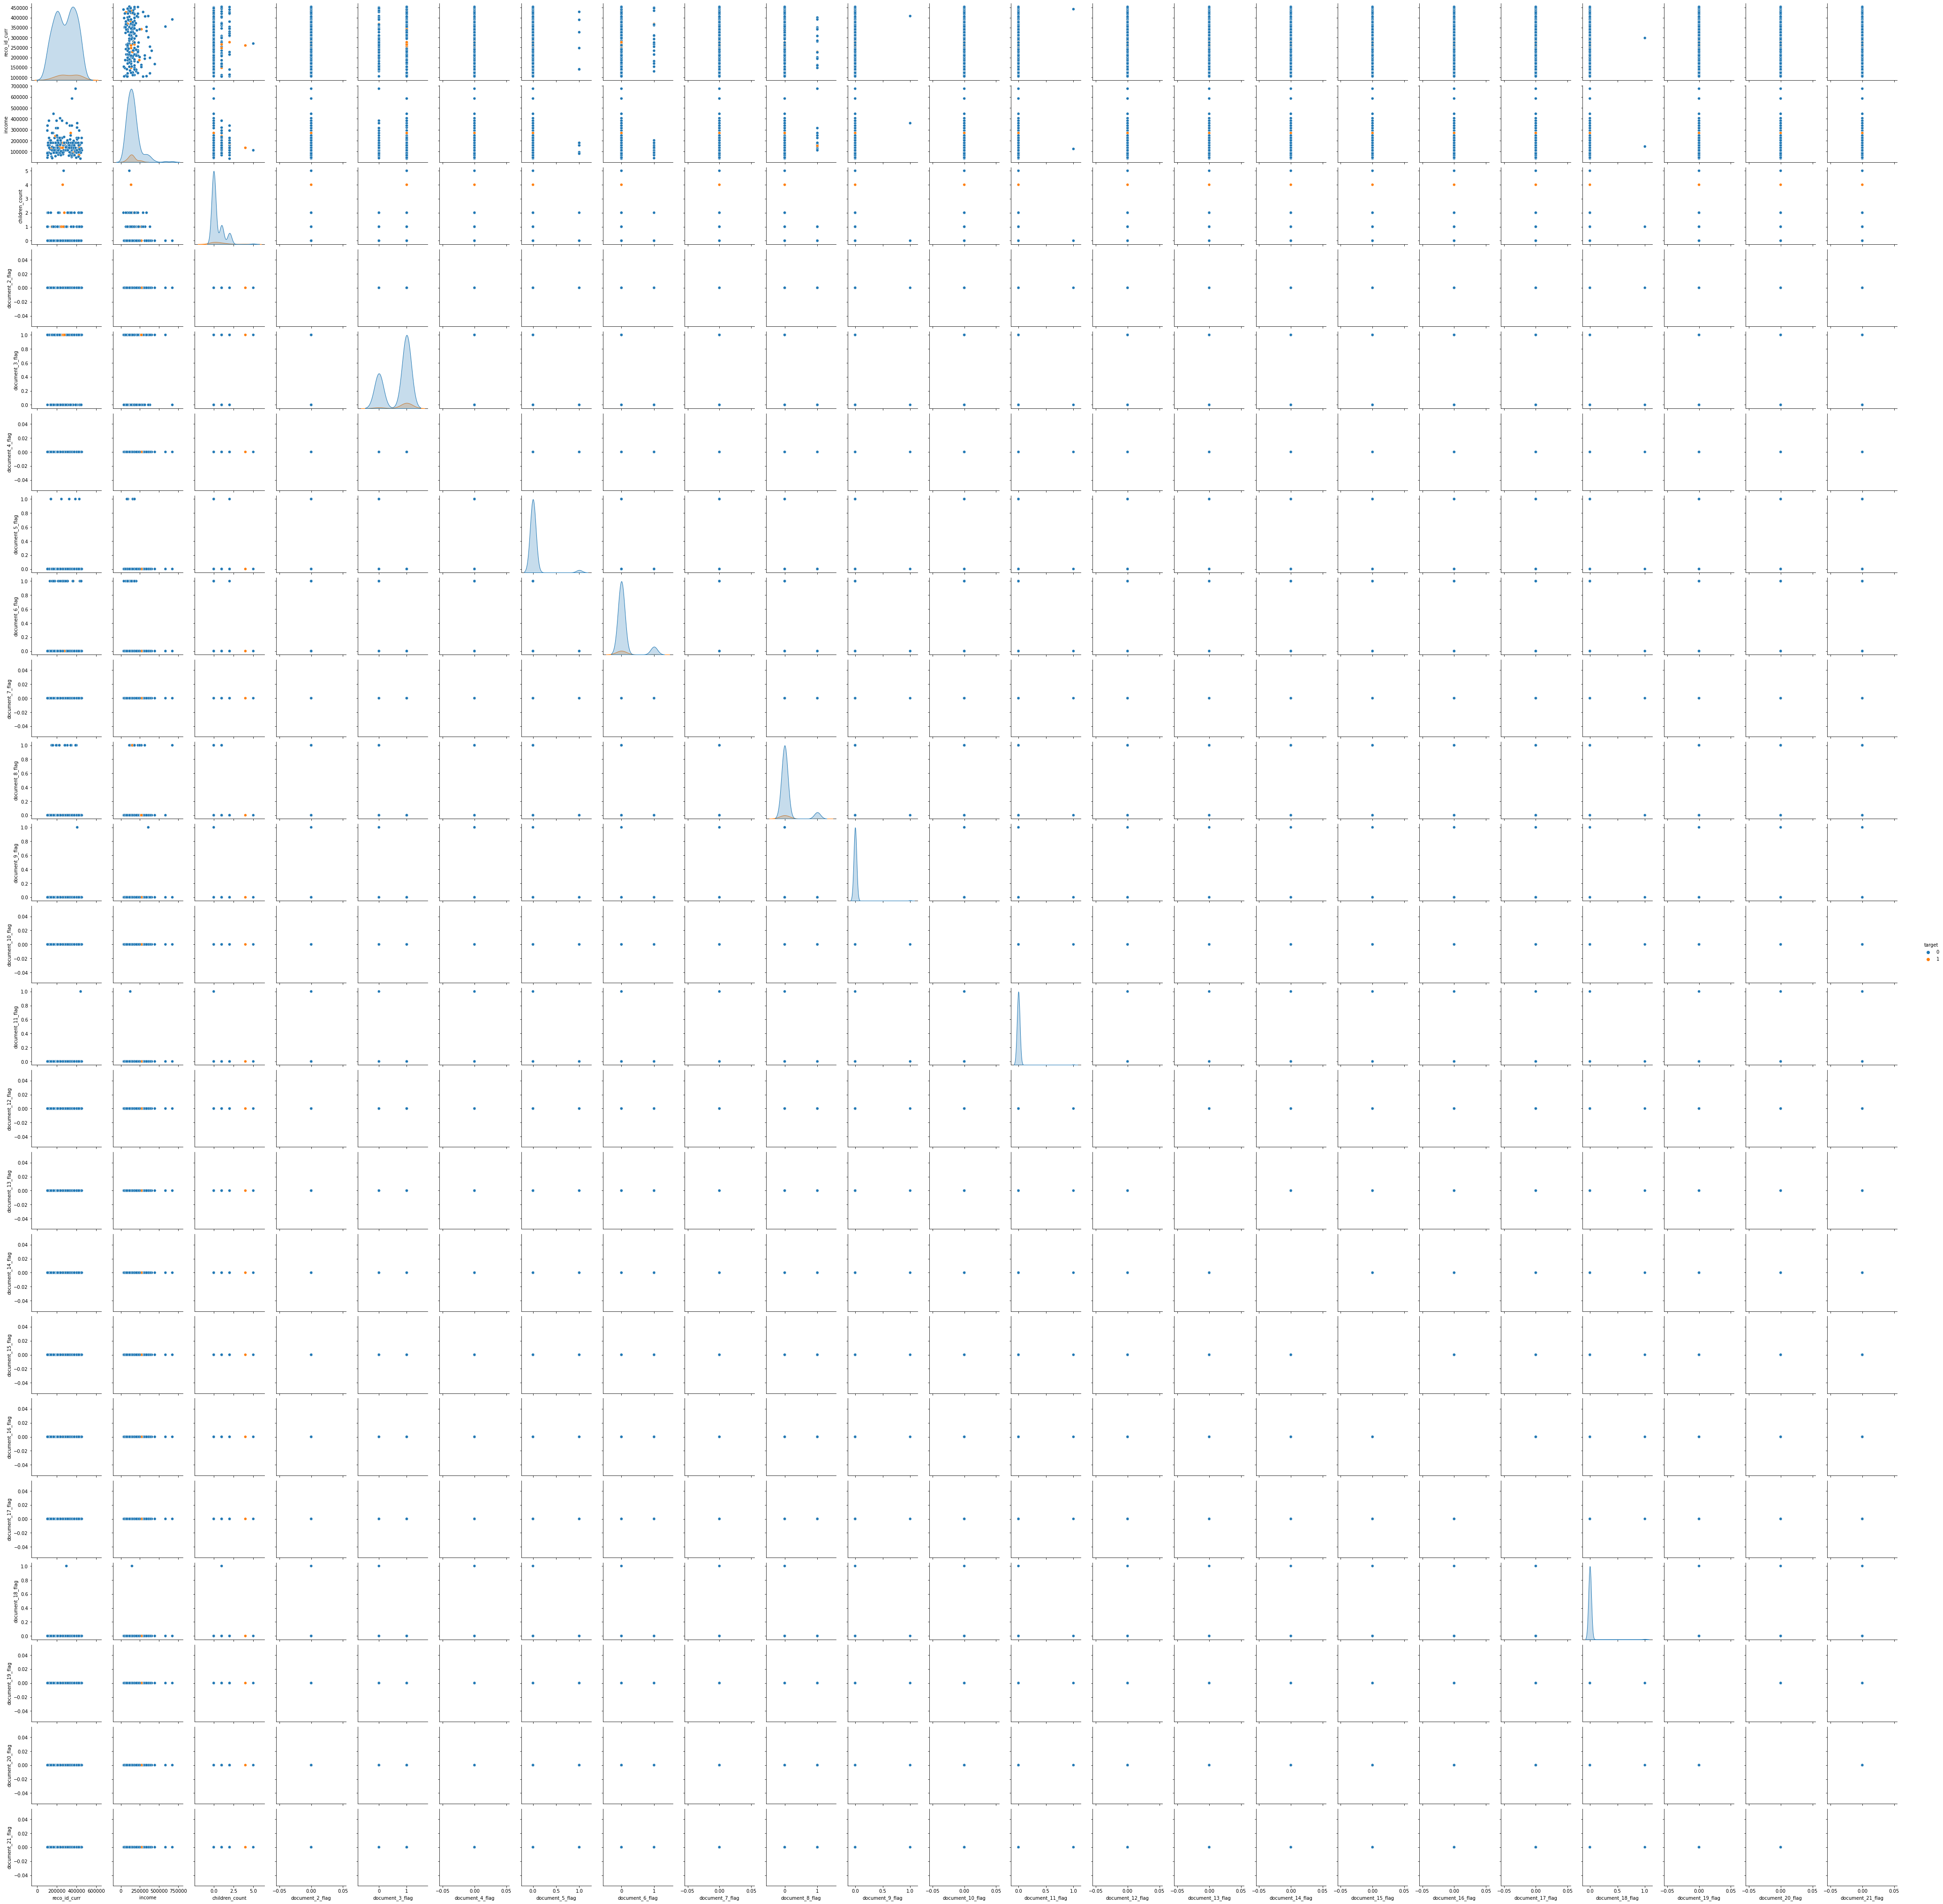

In [ ]:
np.random.seed(2023)
data_Num3_exp = data_Num3.sample(200)
sns.pairplot(data_Num3_exp, hue ='target')
plt.show()

# Подготовка данных для моделей


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data_prev = prev_loan[['reco_id_curr', 'annuity_payment','loan_body_requested', 'loan_body']].fillna(0)

In [ ]:
data_prev

,reco_id_curr,annuity_payment,loan_body_requested,loan_body
0,271877,1730.430,17145.0,17145.0
1,108129,25188.615,607500.0,679671.0
2,122040,15060.735,112500.0,136444.5
3,176158,47041.335,450000.0,470790.0
4,202054,31924.395,337500.0,404055.0
...,...,...,...,...
1670209,352015,14704.290,267295.5,311400.0
1670210,334635,6622.020,87750.0,64291.5
1670211,249544,11520.855,105237.0,102523.5
1670212,400317,18821.520,180000.0,191880.0


In [ ]:
data_Num4x = pd.merge(data_Num1, data_Num3, on = 'reco_id_curr', how = 'inner')

In [ ]:
data_Num4 = pd.merge(data_Num4x, data_prev, on ='reco_id_curr', how = 'inner')

In [ ]:
data_Num4 = data_Num4.drop(axis=0, columns = data_Num4[['target_y', 'loan_body_y']])
data_Num4 = data_Num4.rename(columns={"target_x": "target", "loan_body_x": "loan_body"})

In [ ]:
data_Num4

,reco_id_curr,target,children_count,income,loan_body,document_12_flag,document_13_flag,document_14_flag,document_15_flag,document_20_flag,document_21_flag,annuity_payment,loan_body_requested
0,384575,0,2,207000.0,465457.5,0,0,0,0,0,0,4776.840,40495.5
1,384575,0,2,207000.0,465457.5,0,0,0,0,0,0,7875.000,0.0
2,384575,0,2,207000.0,465457.5,0,0,0,0,0,0,11250.000,0.0
3,384575,0,2,207000.0,465457.5,0,0,0,0,0,0,3022.740,25902.0
4,384575,0,2,207000.0,465457.5,0,0,0,0,0,0,10618.335,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202036,291070,0,1,112500.0,315000.0,0,0,0,0,0,0,13389.210,225000.0
1202037,291070,0,1,112500.0,315000.0,0,0,0,0,0,0,10099.755,225675.0
1202038,291070,0,1,112500.0,315000.0,0,0,0,0,0,0,4058.685,28534.5
1202039,291070,0,1,112500.0,315000.0,0,0,0,0,0,0,3378.105,28485.0


In [ ]:
data_Num5 = pd.merge(data_Num4, card[['reco_id_curr', 'balance', 'credit_limit']], on = 'reco_id_curr', how = 'inner')  

In [ ]:
data_Num5

,reco_id_curr,target,children_count,income,loan_body,document_12_flag,document_13_flag,document_14_flag,document_15_flag,document_20_flag,document_21_flag,annuity_payment,loan_body_requested,balance,credit_limit
0,214010,0,0,247500.0,1281712.5,0,0,0,0,0,0,17902.26,148500.0,158159.88,337500
1,214010,0,0,247500.0,1281712.5,0,0,0,0,0,0,17902.26,148500.0,0.00,337500
2,214010,0,0,247500.0,1281712.5,0,0,0,0,0,0,17902.26,148500.0,0.00,337500
3,214010,0,0,247500.0,1281712.5,0,0,0,0,0,0,17902.26,148500.0,0.00,337500
4,214010,0,0,247500.0,1281712.5,0,0,0,0,0,0,17902.26,148500.0,0.00,337500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17488590,291070,0,1,112500.0,315000.0,0,0,0,0,0,0,8790.03,90225.0,0.00,0
17488591,291070,0,1,112500.0,315000.0,0,0,0,0,0,0,8790.03,90225.0,0.00,0
17488592,291070,0,1,112500.0,315000.0,0,0,0,0,0,0,8790.03,90225.0,0.00,0
17488593,291070,0,1,112500.0,315000.0,0,0,0,0,0,0,8790.03,90225.0,0.00,90000


In [ ]:
test_data_N1 = test_data[['reco_id_curr', 'children_count', 'income', 'loan_body', 'document_12_flag']]
test_data_N11 = test_data[['reco_id_curr', 'children_count', 'income', 'loan_body', 'document_12_flag', 'document_13_flag', 'document_14_flag', 'document_15_flag', 'document_20_flag', 'document_21_flag']] 

In [ ]:
test_data_N3 = test_data_N1.rename(columns={"loan_body_x": "loan_body"}).drop_duplicates(subset=['reco_id_curr'])
test_data_N33 = test_data_N11.rename(columns={"loan_body_x": "loan_body"}).drop_duplicates(subset=['reco_id_curr'])
test_data_Nf = pd.merge(test_data_N3, data_prev, on = 'reco_id_curr', how = 'left')

In [ ]:
test_data_Nf = test_data_Nf.drop_duplicates(subset=['reco_id_curr']).drop(columns=['loan_body_y'])

In [ ]:
test_data_Nf = test_data_Nf.rename(columns = {'loan_body_x':'loan_body'})
test_data_Nf

,reco_id_curr,children_count,income,loan_body,document_12_flag,annuity_payment,loan_body_requested
0,100008,0,99000.0,490495.5,0,17885.835,162598.5
5,100017,1,225000.0,918468.0,0,16967.295,158040.0
7,100019,0,157500.0,299772.0,0,10518.615,84136.5
8,100022,0,112500.0,157500.0,0,6765.975,89091.0
9,100023,1,90000.0,544491.0,0,7992.000,91282.5
...,...,...,...,...,...,...,...
214190,456233,0,225000.0,521280.0,0,9115.560,81810.0
214192,456236,0,585000.0,1575000.0,0,23024.295,324000.0
214196,456245,3,81000.0,269550.0,0,5693.085,45000.0
214198,456248,0,153000.0,331920.0,0,28633.320,225000.0


In [ ]:
test_data_N4 = test_data_Nf[['reco_id_curr', 'children_count',  'income', 'loan_body', 'document_12_flag',  'annuity_payment', 'loan_body_requested']].fillna(0)
test_data_N4

,reco_id_curr,children_count,income,loan_body,document_12_flag,annuity_payment,loan_body_requested
0,100008,0,99000.0,490495.5,0,17885.835,162598.5
5,100017,1,225000.0,918468.0,0,16967.295,158040.0
7,100019,0,157500.0,299772.0,0,10518.615,84136.5
8,100022,0,112500.0,157500.0,0,6765.975,89091.0
9,100023,1,90000.0,544491.0,0,7992.000,91282.5
...,...,...,...,...,...,...,...
214190,456233,0,225000.0,521280.0,0,9115.560,81810.0
214192,456236,0,585000.0,1575000.0,0,23024.295,324000.0
214196,456245,3,81000.0,269550.0,0,5693.085,45000.0
214198,456248,0,153000.0,331920.0,0,28633.320,225000.0


In [ ]:
test_data_N5 = pd.merge(test_data_N4, card[['reco_id_curr', 'balance', 'credit_limit']], on = 'reco_id_curr', how = 'left').drop_duplicates(subset=['reco_id_curr']).fillna(0)
test_data_N5

,reco_id_curr,children_count,income,loan_body,document_12_flag,annuity_payment,loan_body_requested,balance,credit_limit
0,100008,0,99000.0,490495.5,0,17885.835,162598.5,0.0,0.0
1,100017,1,225000.0,918468.0,0,16967.295,158040.0,0.0,0.0
2,100019,0,157500.0,299772.0,0,10518.615,84136.5,0.0,0.0
3,100022,0,112500.0,157500.0,0,6765.975,89091.0,0.0,0.0
4,100023,1,90000.0,544491.0,0,7992.000,91282.5,0.0,225000.0
...,...,...,...,...,...,...,...,...,...
518281,456233,0,225000.0,521280.0,0,9115.560,81810.0,0.0,45000.0
518291,456236,0,585000.0,1575000.0,0,23024.295,324000.0,0.0,0.0
518385,456245,3,81000.0,269550.0,0,5693.085,45000.0,0.0,0.0
518386,456248,0,153000.0,331920.0,0,28633.320,225000.0,0.0,900000.0


In [ ]:
k = 0.4 # задаём долю тестовых данных в нашем датасете 
mask = (np.random.random(data_Num5.shape[0]) < k) # формируем маску для тестовых данных
X_train = data_Num5[~mask][data_Num5.columns.drop(['target', 'reco_id_curr', 'document_13_flag', 'document_14_flag', 'document_15_flag', 'document_20_flag', 'document_21_flag'])]
X_train1 = data_Num4[data_Num4.columns.drop(['target', 'reco_id_curr', 'annuity_payment', 'loan_body_requested'])]
# X - признаки, на основе которых модель будет делать предсказание
y_train = data_Num5[~mask]['target']
y_train1 = data_Num4['target']

# y - целевой признак

X_test = data_Num5[mask][data_Num5.columns.drop(['target', 'reco_id_curr', 'document_13_flag', 'document_14_flag', 'document_15_flag', 'document_20_flag', 'document_21_flag'])]
X_train1 = data_Num4[data_Num4.columns.drop(['target', 'reco_id_curr', 'annuity_payment', 'loan_body_requested'])]
y_test = data_Num5[mask]['target']

In [ ]:
X_train

,children_count,income,loan_body,document_12_flag,annuity_payment,loan_body_requested,balance,credit_limit
3,0,247500.0,1281712.5,0,17902.26,148500.0,0.000,337500
7,0,247500.0,1281712.5,0,17902.26,148500.0,0.000,337500
8,0,247500.0,1281712.5,0,17902.26,148500.0,176894.775,337500
9,0,247500.0,1281712.5,0,17902.26,148500.0,0.000,337500
10,0,247500.0,1281712.5,0,17902.26,148500.0,0.000,337500
...,...,...,...,...,...,...,...,...
17488581,1,112500.0,315000.0,0,8790.03,90225.0,0.000,0
17488584,1,112500.0,315000.0,0,8790.03,90225.0,0.000,0
17488586,1,112500.0,315000.0,0,8790.03,90225.0,0.000,0
17488589,1,112500.0,315000.0,0,8790.03,90225.0,0.000,0


In [ ]:
y_train

# Работа с моделями(Данные решения не показывали высокий скор)


In [ ]:
clf1 = RandomForestClassifier(n_estimators=50)
clf1 = clf1.fit(X_train, y_train)

In [ ]:
Y_pred = clf1.predict_proba(test_data_N5.drop(columns = 'reco_id_curr'))
Y_pred

array([[0.94, 0.06],
       [0.98, 0.02],
       [0.98, 0.02],
       ...,
       [0.98, 0.02],
       [0.86, 0.14],
       [0.98, 0.02]])

In [ ]:
Y_pred1 = pd.DataFrame()
Y_pred1['reco_id_curr'] = test_data['reco_id_curr']
Y_pred1 = Y_pred1.set_index('reco_id_curr')
Y_pred1['target'] = Y_pred[:, [1]]
Y_pred1.to_csv('/content/gdrive/My Drive/answer.csv')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clfd = AdaBoostClassifier(n_estimators=100)
clfd = clfd.fit(X_train, y_train)

In [ ]:
FF =  clfd.predict_proba(test_data_N5.drop(columns = 'reco_id_curr'))

In [ ]:
F_pred1 = pd.DataFrame()
F_pred1['reco_id_curr'] = test_data_N4['reco_id_curr']
F_pred1 = F_pred1.set_index('reco_id_curr')
F_pred1['target'] = FF[:, [1]]
F_pred1.to_csv('/content/gdrive/My Drive/answer.csv')

In [ ]:
clfg = RandomForestClassifier(n_estimators=50)
clfg = clfg.fit(X_train1, y_train1)

In [ ]:
Y_predg = clfg.predict_proba(test_data_N11.drop(columns = 'reco_id_curr'))
Y_predg

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.90832407, 0.09167593],
       ...,
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.90318257, 0.09681743]])

In [ ]:
G_predg = pd.DataFrame()
G_predg['reco_id_curr'] = test_data_N1['reco_id_curr']
G_predg = G_predg.set_index('reco_id_curr')
G_predg['target'] = Y_predg[:, [1]]
G_predg.to_csv('/content/gdrive/My Drive/answer.csv')